In [5]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
from sklearn import preprocessing
import numpy as np
import time
import os
from PIL import Image
import json
from pathlib import Path
import numpy as np
from sklearn.preprocessing import normalize
from datetime import datetime
import random
import matplotlib.pyplot as plt # plt 用於顯示圖片
import matplotlib.image as mpimg # mpimg 用於讀取圖片
import cv2

In [6]:
# Replace with valid values
#確認以下這些東西有無正確
ENDPOINT = "https://stylervision.cognitiveservices.azure.com/"
training_key = "d7fb9c199bdb4c76952c6cb56b862b47"
prediction_key = "afbc2a74d69247429481db68cb64be3d"
prediction_resource_id = "/subscriptions/14bf462c-fe1a-47c2-a915-5cacdd27e7b1/resourceGroups/styler/providers/Microsoft.CognitiveServices/accounts/stylervision-Prediction"
publish_iteration_name = "Iteration1"
project_id = "8784e5a2-fd70-4be9-81a0-57c912a403f3"
iteration_id = "478c407f-2dc7-421a-b2ab-1f70a9425cd3"

In [7]:
credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(ENDPOINT, credentials)
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(ENDPOINT, prediction_credentials)

In [8]:
# The iteration is now trained. Publish it to the project endpoint
#trainer.publish_iteration(project.id, iteration.id, publish_iteration_name, prediction_resource_id)

trainer.publish_iteration(project_id, iteration_id , publish_iteration_name ,  prediction_resource_id)

print ("Done!")

Done!


black_1.jpg


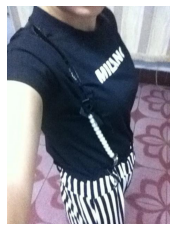

stripe: 97.46% 
lattice: 2.16% 
dot: 0.71% 
plain: 0.23% 
cam: 0.21% 
floral: 0.17% 
black_2.jpg


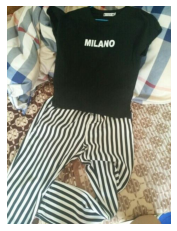

stripe: 99.36% 
cam: 1.89% 
floral: 0.15% 
lattice: 0.02% 
dot: 0.01% 
plain: 0.01% 
black_3.jpg


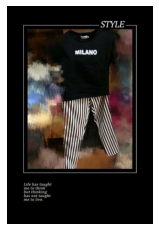

stripe: 99.97% 
cam: 2.26% 
dot: 0.11% 
lattice: 0.10% 
floral: 0.00% 
plain: 0.00% 
black_4.jpg


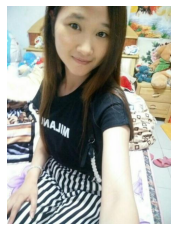

stripe: 87.19% 
lattice: 6.89% 
dot: 3.80% 
floral: 1.51% 
cam: 0.24% 
plain: 0.03% 
black_5.jpg


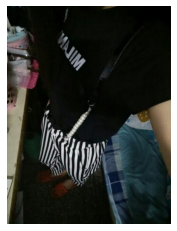

stripe: 86.76% 
lattice: 26.17% 
dot: 0.87% 
cam: 0.70% 
floral: 0.15% 
plain: 0.07% 
black_6.jpg


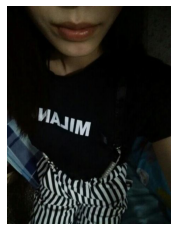

stripe: 88.02% 
lattice: 1.44% 
plain: 1.37% 
cam: 0.60% 
floral: 0.16% 
dot: 0.12% 
black_7.jpg


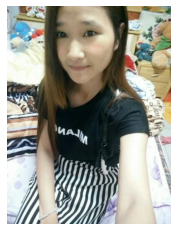

stripe: 94.74% 
floral: 3.57% 
lattice: 3.02% 
dot: 0.58% 
cam: 0.25% 
plain: 0.11% 
black_8.jpg


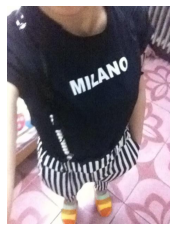

stripe: 99.14% 
dot: 0.75% 
floral: 0.59% 
lattice: 0.15% 
plain: 0.06% 
cam: 0.04% 
black_9.jpg


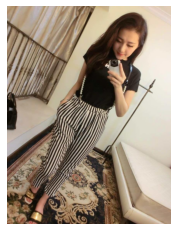

stripe: 99.75% 
floral: 14.72% 
lattice: 0.26% 
dot: 0.08% 
cam: 0.02% 
plain: 0.00% 
black_10.jpg


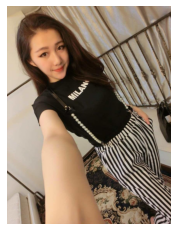

stripe: 98.55% 
floral: 5.02% 
lattice: 0.72% 
dot: 0.34% 
cam: 0.03% 
plain: 0.00% 
black_11.jpg


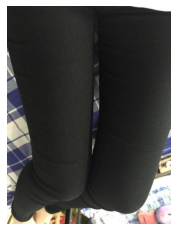

lattice: 20.55% 
stripe: 6.32% 
plain: 2.67% 
cam: 1.30% 
floral: 0.24% 
dot: 0.22% 
black_12.jpg


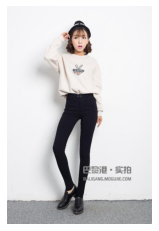

stripe: 56.64% 
cam: 19.15% 
lattice: 2.35% 
plain: 0.41% 
floral: 0.37% 
dot: 0.07% 


In [9]:
# Now there is a trained endpoint that can be used to make a prediction

# Open the sample image and get back the prediction results.
test_path ="D:/styler/black/"
   
def quicktest():
    for image_num in range(1, 13):  
        img = "black_{}.jpg".format(image_num)
        lena = mpimg.imread(test_path+img)
        plt.imshow(lena)
        plt.axis('off') # 不顯示座標軸
        print(img)
        plt.show()
        with open(test_path+img, mode="rb") as test_data:#記得改project id
            results = predictor.classify_image(project_id,publish_iteration_name, test_data)
        for prediction in results.predictions:
            print(prediction.tag_name + ": {0:.2f}% ".format(prediction.probability * 100))

quicktest()

photo (11).jpg


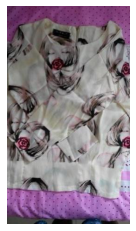

lattice: 98.50% 
floral: 74.85% 
cam: 0.10% 
plain: 0.01% 
stripe: 0.01% 
dot: 0.00% 
photo (12).jpg


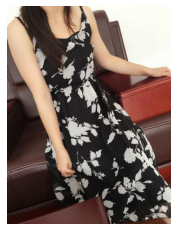

floral: 99.97% 
lattice: 0.28% 
cam: 0.15% 
dot: 0.14% 
plain: 0.06% 
stripe: 0.01% 
photo (13).jpg


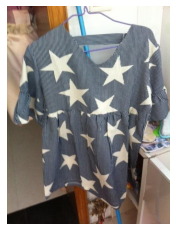

floral: 97.36% 
cam: 0.44% 
lattice: 0.21% 
stripe: 0.17% 
dot: 0.01% 
plain: 0.01% 
photo (14).jpg


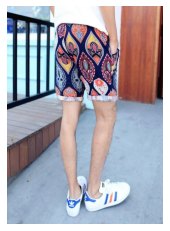

stripe: 52.37% 
floral: 26.91% 
lattice: 6.23% 
dot: 1.56% 
plain: 0.15% 
cam: 0.08% 
photo (15).jpg


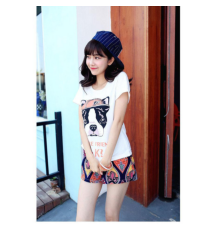

stripe: 25.34% 
floral: 19.16% 
lattice: 6.97% 
dot: 1.65% 
cam: 0.07% 
plain: 0.01% 
photo (16).jpg


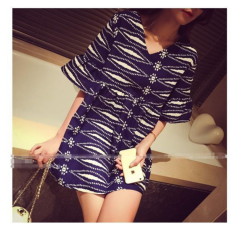

stripe: 95.81% 
dot: 8.52% 
floral: 2.43% 
lattice: 0.53% 
cam: 0.01% 
plain: 0.00% 
photo (17).jpg


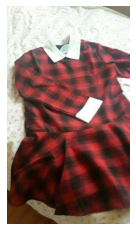

lattice: 82.07% 
floral: 13.81% 
plain: 4.46% 
dot: 0.67% 
cam: 0.20% 
stripe: 0.01% 
photo (18).jpg


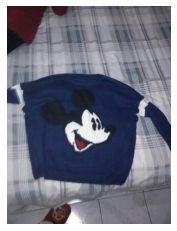

lattice: 85.64% 
stripe: 7.72% 
plain: 0.70% 
cam: 0.21% 
dot: 0.08% 
floral: 0.04% 
photo (19).jpg


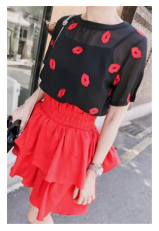

dot: 93.77% 
floral: 15.23% 
stripe: 2.23% 
cam: 0.98% 
lattice: 0.12% 
plain: 0.01% 
photo (20).jpg


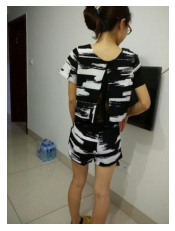

stripe: 97.95% 
floral: 2.37% 
cam: 0.21% 
lattice: 0.13% 
dot: 0.10% 
plain: 0.02% 
photo (21).jpg


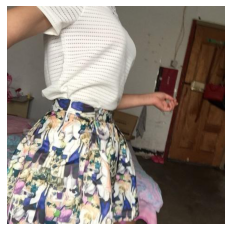

floral: 85.30% 
stripe: 1.64% 
dot: 1.46% 
cam: 0.17% 
lattice: 0.12% 
plain: 0.02% 
photo (22).jpg


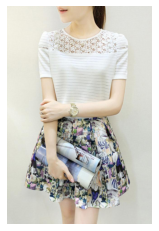

floral: 99.10% 
lattice: 7.53% 
cam: 0.21% 
stripe: 0.11% 
plain: 0.01% 
dot: 0.01% 
photo (23).jpg


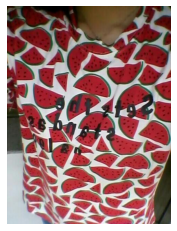

dot: 96.08% 
cam: 0.79% 
stripe: 0.60% 
lattice: 0.57% 
floral: 0.48% 
plain: 0.01% 
photo (24).jpg


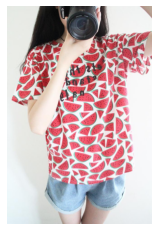

dot: 67.11% 
floral: 51.20% 
lattice: 0.23% 
stripe: 0.02% 
cam: 0.01% 
plain: 0.00% 
photo (25).jpg


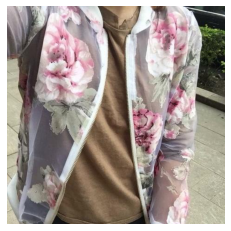

floral: 95.14% 
cam: 10.64% 
lattice: 1.20% 
stripe: 0.07% 
plain: 0.05% 
dot: 0.03% 
photo (26).jpg


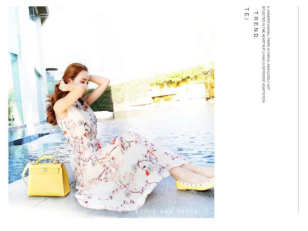

floral: 99.88% 
stripe: 2.71% 
dot: 0.47% 
plain: 0.04% 
cam: 0.02% 
lattice: 0.01% 
photo (27).jpg


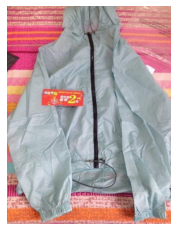

cam: 97.08% 
lattice: 6.63% 
stripe: 1.02% 
floral: 0.44% 
dot: 0.25% 
plain: 0.06% 
photo (28).jpg


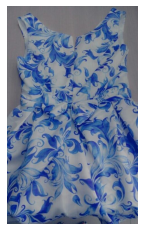

floral: 99.79% 
stripe: 1.08% 
plain: 0.26% 
cam: 0.16% 
lattice: 0.14% 
dot: 0.01% 
photo (29).jpg


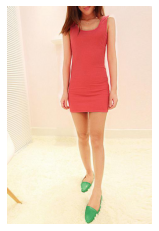

floral: 9.69% 
plain: 6.70% 
lattice: 4.74% 
stripe: 4.61% 
dot: 3.87% 
cam: 0.02% 
photo (30).jpg


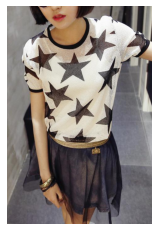

floral: 33.32% 
cam: 14.13% 
lattice: 5.71% 
stripe: 0.03% 
plain: 0.03% 
dot: 0.01% 
photo (31).jpg


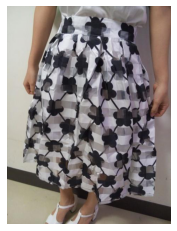

floral: 36.38% 
lattice: 17.79% 
dot: 1.48% 
cam: 0.28% 
plain: 0.01% 
stripe: 0.00% 
photo (32).jpg


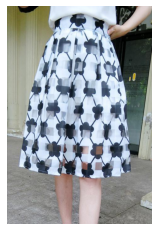

lattice: 54.98% 
dot: 18.25% 
floral: 0.73% 
cam: 0.52% 
plain: 0.02% 
stripe: 0.00% 


In [10]:
# Now there is a trained endpoint that can be used to make a prediction

# Open the sample image and get back the prediction results.
test_path ="D:/styler/testt/"
   
def quicktest():
    for image_num in range(11, 33):  
        img = "photo ({}).jpg".format(image_num)
        lena = mpimg.imread(test_path+img)
        plt.imshow(lena)
        plt.axis('off') # 不顯示座標軸
        print(img)
        plt.show()
        with open(test_path+img, mode="rb") as test_data:#記得改project id
            results = predictor.classify_image(project_id,publish_iteration_name, test_data)
        for prediction in results.predictions:
            print(prediction.tag_name + ": {0:.2f}% ".format(prediction.probability * 100))

quicktest()

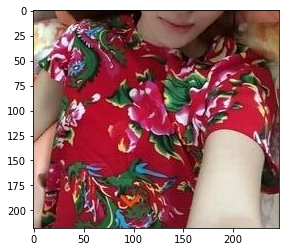

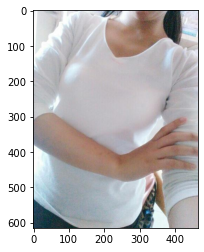

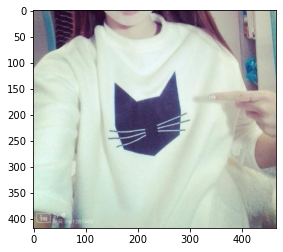

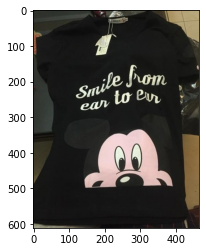

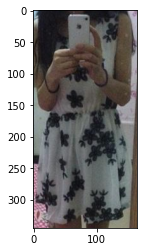

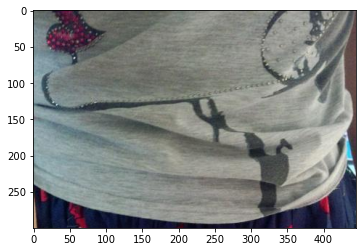

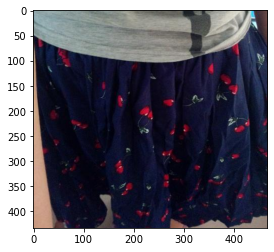

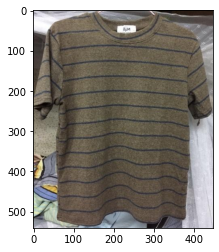

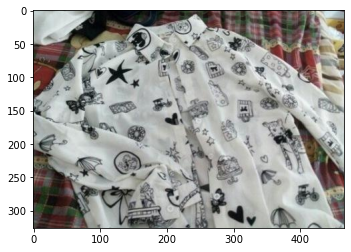

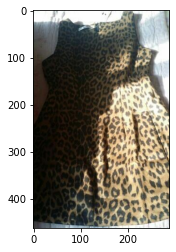

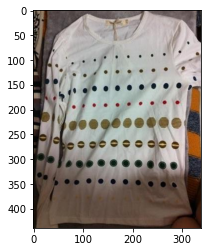

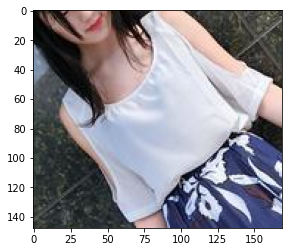

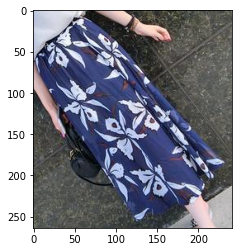

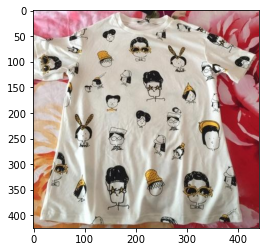

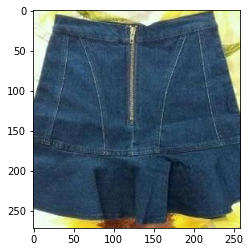

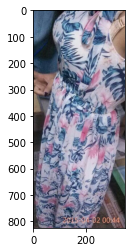

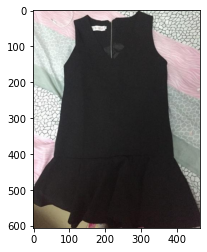

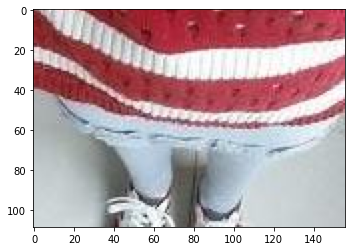

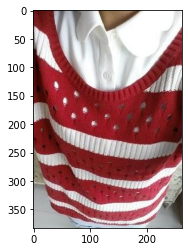

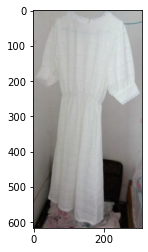

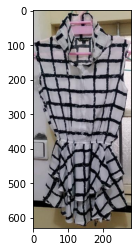

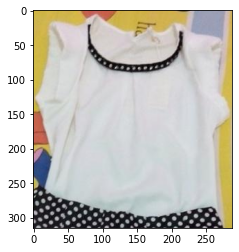

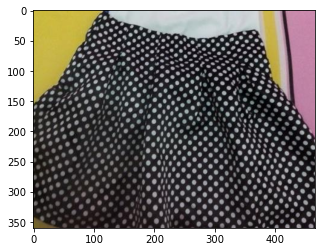

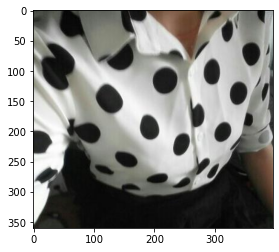

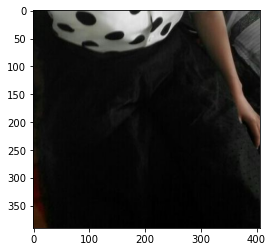

In [39]:
base_location = 'D:/styler/test1/'
jList = os.listdir(base_location)

for file in jList:
    
    if file.endswith(".jpg"):
#         img = Image( os.path.join(base_location,file))
#         img = Image.open( os.path.join(base_location,file))
#         img = cv2.imread("C:\\Users\\qingyu\\Desktop\\123\\000032.jpg")
        img = cv2.imread(os.path.join(base_location,file))
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
    if file.endswith(".json"):
        with open(os.path.join(base_location,file) , 'r') as reader:
            jf = json.loads(reader.read())
        strjf = str(jf)
        maxi = strjf.count('item') + 1
        for i in range (1,maxi):
            stri = str(i)
            # 裁切區域的 x 與 y 座標（左上角）
            x1 = jf['item'+stri]['bounding_box'][0]
            y1 = jf['item'+stri]['bounding_box'][3]
            # 裁切區域的 x 與 y 座標（右下角）
            x2 = jf['item'+stri]['bounding_box'][2]
            y2 = jf['item'+stri]['bounding_box'][1]
            # 裁切圖片
            cut_img = img_rgb[y2:y1, x1:x2]  
            plt.imshow(cut_img)
            plt.show()
            cut_img1 = cv2.cvtColor(cut_img, cv2.COLOR_BGR2RGB)
            name = file.split('.')[0]
            cv2.imwrite(base_location +'new/' + name + '_' + stri +'.jpg', cut_img1)
            
#             with open(test_path+img, mode="rb") as test_data:
#                 results = predictor.classify_image(project_id,publish_iteration_name, test_data)
#             for prediction in results.predictions:
#                 print(prediction.tag_name + ": {0:.2f}% ".format(prediction.probability * 100))
            
            
            
            
           

['000026_1.jpg', '000033_1.jpg', '000064_1.jpg', '000089_1.jpg', '000128_1.jpg', '000129_1.jpg', '000129_2.jpg', '000218_1.jpg', '000315_1.jpg', '000369_1.jpg', '000467_1.jpg', '000527_1.jpg', '000527_2.jpg', '000564_1.jpg', '000593_1.jpg', '000797_1.jpg', '000873_1.jpg', '000892_1.jpg', '000892_2.jpg', '000997_1.jpg', '001025_1.jpg', '001115_1.jpg', '001115_2.jpg', '001244_1.jpg', '001244_2.jpg']
D:/styler/test1/new/000026_1.jpg


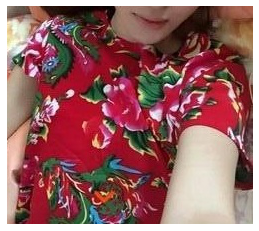

floral: 97.80% 
stripe: 0.46% 
lattice: 0.36% 
cam: 0.24% 
dot: 0.23% 
plain: 0.08% 
D:/styler/test1/new/000033_1.jpg


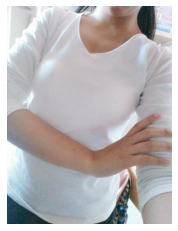

plain: 68.39% 
floral: 13.10% 
stripe: 2.84% 
dot: 2.56% 
lattice: 2.18% 
cam: 0.01% 
D:/styler/test1/new/000064_1.jpg


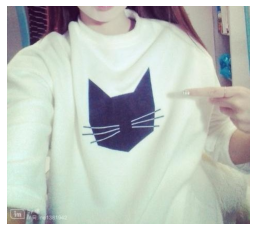

lattice: 49.08% 
dot: 18.78% 
stripe: 11.59% 
plain: 6.40% 
floral: 0.73% 
cam: 0.02% 
D:/styler/test1/new/000089_1.jpg


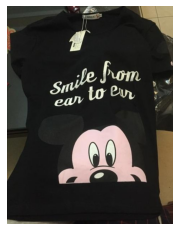

dot: 11.69% 
cam: 9.25% 
plain: 7.50% 
floral: 0.73% 
stripe: 0.63% 
lattice: 0.12% 
D:/styler/test1/new/000128_1.jpg


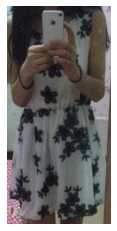

floral: 74.26% 
cam: 8.77% 
plain: 1.00% 
dot: 0.37% 
stripe: 0.26% 
lattice: 0.09% 
D:/styler/test1/new/000129_1.jpg


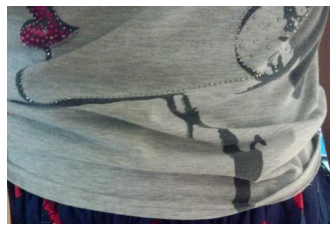

cam: 52.12% 
lattice: 4.53% 
dot: 2.83% 
stripe: 0.80% 
floral: 0.59% 
plain: 0.36% 
D:/styler/test1/new/000129_2.jpg


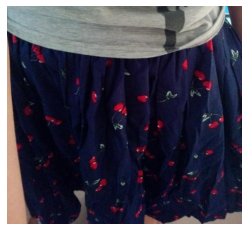

floral: 25.23% 
dot: 11.95% 
lattice: 0.40% 
cam: 0.27% 
plain: 0.18% 
stripe: 0.04% 
D:/styler/test1/new/000218_1.jpg


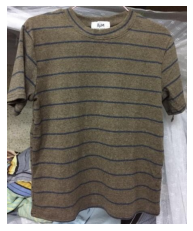

stripe: 25.20% 
cam: 9.63% 
lattice: 3.60% 
plain: 2.89% 
dot: 0.03% 
floral: 0.02% 
D:/styler/test1/new/000315_1.jpg


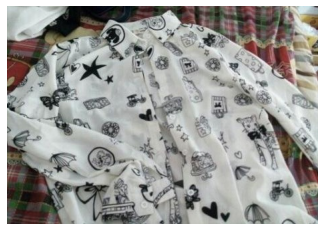

floral: 95.76% 
cam: 13.03% 
dot: 0.25% 
lattice: 0.17% 
plain: 0.01% 
stripe: 0.01% 
D:/styler/test1/new/000369_1.jpg


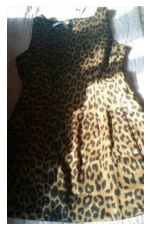

dot: 34.40% 
floral: 4.70% 
lattice: 1.25% 
cam: 0.68% 
plain: 0.07% 
stripe: 0.02% 
D:/styler/test1/new/000467_1.jpg


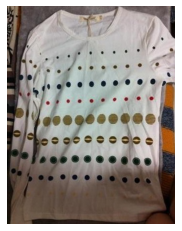

dot: 100.00% 
cam: 0.03% 
plain: 0.01% 
stripe: 0.01% 
floral: 0.01% 
lattice: 0.00% 
D:/styler/test1/new/000527_1.jpg


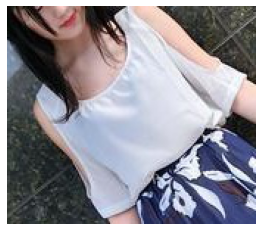

floral: 97.11% 
stripe: 1.39% 
dot: 1.24% 
plain: 0.79% 
lattice: 0.53% 
cam: 0.03% 
D:/styler/test1/new/000527_2.jpg


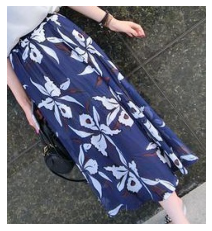

floral: 93.42% 
cam: 1.39% 
stripe: 0.56% 
lattice: 0.09% 
dot: 0.03% 
plain: 0.02% 
D:/styler/test1/new/000564_1.jpg


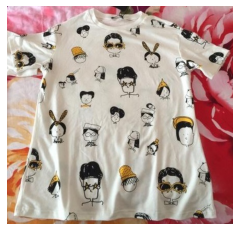

floral: 94.82% 
cam: 1.24% 
dot: 0.59% 
plain: 0.14% 
lattice: 0.01% 
stripe: 0.01% 
D:/styler/test1/new/000593_1.jpg


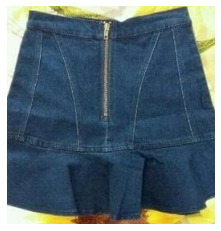

stripe: 63.41% 
lattice: 57.07% 
plain: 1.25% 
dot: 0.73% 
floral: 0.21% 
cam: 0.09% 
D:/styler/test1/new/000797_1.jpg


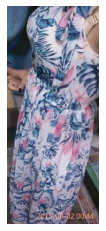

floral: 99.93% 
stripe: 0.36% 
plain: 0.20% 
cam: 0.17% 
lattice: 0.08% 
dot: 0.01% 
D:/styler/test1/new/000873_1.jpg


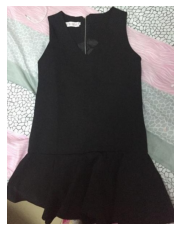

plain: 35.46% 
floral: 9.06% 
lattice: 5.38% 
dot: 4.61% 
cam: 0.15% 
stripe: 0.04% 
D:/styler/test1/new/000892_1.jpg


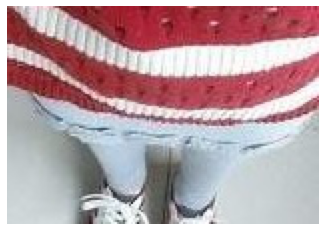

stripe: 78.30% 
dot: 16.00% 
lattice: 13.60% 
cam: 0.11% 
floral: 0.04% 
plain: 0.00% 
D:/styler/test1/new/000892_2.jpg


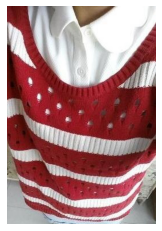

dot: 99.98% 
cam: 0.19% 
lattice: 0.18% 
stripe: 0.14% 
floral: 0.06% 
plain: 0.01% 
D:/styler/test1/new/000997_1.jpg


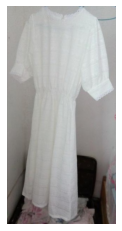

plain: 28.58% 
floral: 21.37% 
lattice: 12.46% 
dot: 1.57% 
stripe: 1.18% 
cam: 0.00% 
D:/styler/test1/new/001025_1.jpg


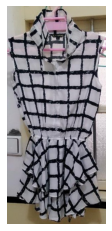

stripe: 60.78% 
lattice: 39.44% 
dot: 0.43% 
cam: 0.26% 
floral: 0.12% 
plain: 0.02% 
D:/styler/test1/new/001115_1.jpg


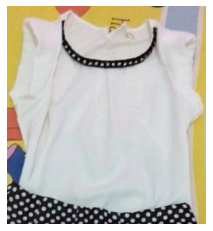

dot: 53.24% 
stripe: 12.62% 
plain: 8.09% 
floral: 3.59% 
lattice: 1.97% 
cam: 0.31% 
D:/styler/test1/new/001115_2.jpg


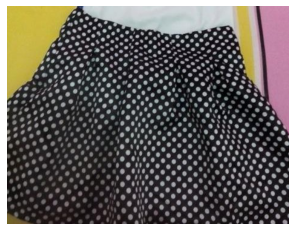

dot: 99.32% 
plain: 0.17% 
lattice: 0.14% 
floral: 0.10% 
stripe: 0.01% 
cam: 0.01% 
D:/styler/test1/new/001244_1.jpg


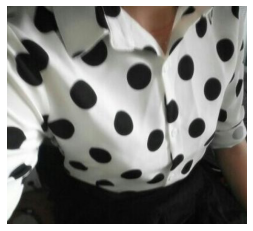

dot: 99.99% 
cam: 1.01% 
stripe: 0.15% 
lattice: 0.13% 
plain: 0.02% 
floral: 0.00% 
D:/styler/test1/new/001244_2.jpg


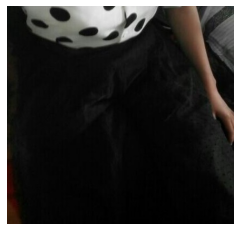

dot: 96.34% 
cam: 5.52% 
lattice: 1.25% 
stripe: 0.14% 
plain: 0.09% 
floral: 0.01% 


In [64]:
if __name__ == '__main__':
    base_location = 'D:/styler/test1/new/'
    jList = os.listdir(base_location)

    def quicktest():   
        for filenames in os.walk(base_location):
            print(filenames[2])
            fn = filenames[2]
            
            for f in fn:
                img_path = base_location+f
                print(img_path)
                lena = mpimg.imread(img_path)
                plt.imshow(lena)
                plt.axis('off')
                plt.show()
                with open(img_path, mode="rb") as test_data:
                    results = predictor.classify_image(project_id,publish_iteration_name, test_data)
                    

                for prediction in results.predictions:
                    print(prediction.tag_name + ": {0:.2f}% ".format(prediction.probability * 100))
                
            
quicktest()
